<a href="https://colab.research.google.com/github/Vasavi430/Cursor/blob/main/Mini_Project1_12-12-24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

**Task  1: Reading the dataset**

In [3]:
#task 1-READING THE DATASET
data=pd.read_csv('/content/dataset (1).csv')

In [4]:
data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0



Task-2
CHECKING MISSING VALUES & IF THERE ARE SOME DUBLICATE ROWS OR NOT

In [5]:

# prompt: Using dataframe Set: CHECKING MISSING VALUES & IF THERE ARE SOME DUBLICATE ROWS OR NOT

# Check for missing values
print(data.isnull().sum())

# Check for duplicate rows
print(data.duplicated().sum())

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64
0


**Task-3
PLOTTING THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES ON SEASON/HOLIDAY/WEEKEND/WEATHERCODE**

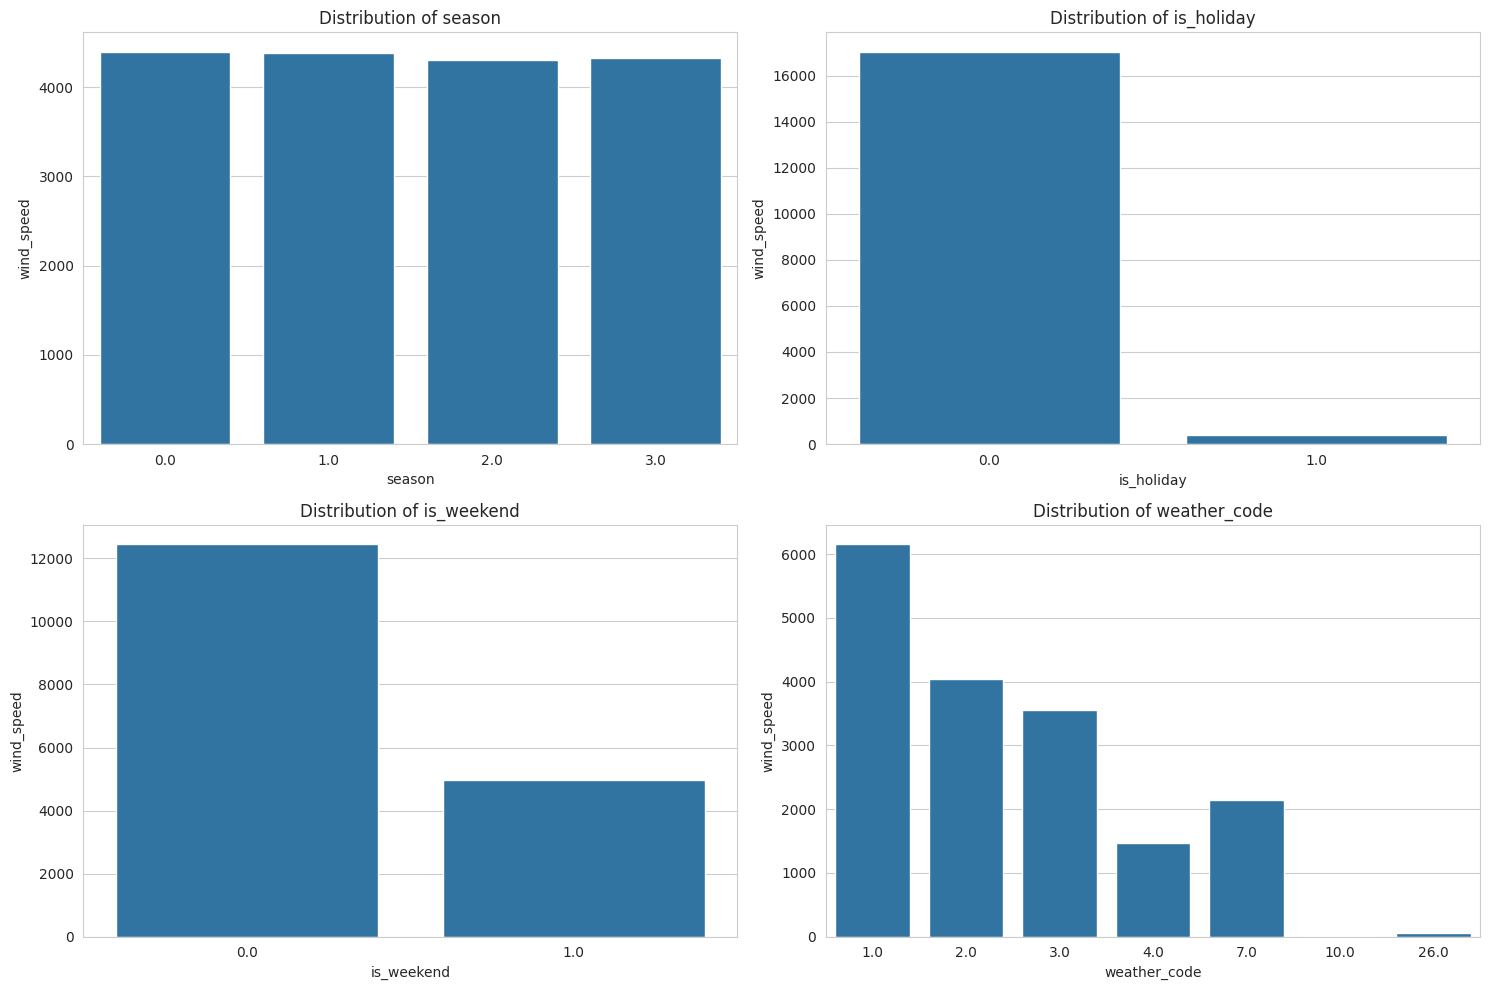

In [8]:
#Task-3 PLOTTING THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES ON SEASON/HOLIDAY/WEEKEND/WEATHERCODE
# prompt: Using dataframe Set: PLOTTING THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES ON SEASON/HOLIDAY/WEEKEND/WEATHERCODE

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'timestamp' to datetime objects if not already
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Create discrete features for plotting
discrete_features = ['season', 'is_holiday', 'is_weekend', 'weather_code']

# Set the aesthetic style of the plots
#sns.data_style("whitegrid") # This line is causing the error. "data_style" is not a valid function in seaborn.
sns.set_style("whitegrid") # Use set_style or set_theme to change the aesthetic style.

# Create subplots for each discrete feature
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Iterate over discrete features and create distributions
for i, feature in enumerate(discrete_features):
    sns.countplot(x=feature, data=data, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}") # Use set_title instead of data_title
    axes[i].set_xlabel(feature) # Use set_xlabel instead of data_xlabel
    axes[i].set_ylabel("wind_speed") # Use set_ylabel instead of data_ylabel


plt.tight_layout()
plt.show()

**Task-4
LOOKING AT THE DATA TYPES OF EACH VARIABLE, TRANSFORM TIMESTAMP IN TYPE & SET IT AS INDEX**

In [10]:
#TASK 04 - LOOKING AT THE DATA TYPES OF EACH VARIABLE, TRANSFORM TIMESTAMP IN TYPE &data IT AS INDEX
# prompt: Using dataframe data: LOOKING AT THE DATA TYPES OF EACH VARIABLE, TRANSFORM TIMESTAMP IN TYPE & data IT AS INDEX

# Check if 'timestamp' is already the index
if 'timestamp' not in data.columns:
    # If 'timestamp' is not a column, it's likely the index
    # Reset the index to make 'timestamp' a column again
   data = data.reset_index()

# Convert 'timestamp' column to datetime objects
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Set the 'timestamp' column as the index of the DataFrame
data = data.set_index('timestamp') # Changed data_index to set_index
print(data)

                      cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                              
2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
...                   ...  ...  ...    ...         ...           ...   
2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0           3.0   
2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0           4.0   
2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0           4.0   
2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0           4.0   
2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0           2.0   

                     is_holiday  is_weekend  season  
timestamp

**Task-5
MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC.**

In [11]:

#TASK 05 - MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC.
import pandas as pd

# Assuming 'data' is your DataFrame and 'timestamp' is the index
# Extract the features from the index
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data['hour'] = data.index.hour
data['dayofweek'] = data.index.dayofweek


# Define a function to map month to season
def month_to_season(month):
    if 3 <= month <= 5:
        return 0  # Spring
    elif 6 <= month <= 8:
        return 1  # Summer
    elif 9 <= month <= 11:
        return 2  # Autumn
    else:
        return 3  # Winter

# Create the 'season' column based on month
data['season_from_month'] = data['month'].apply(month_to_season)

# Optionally, verify the new columns are included
data.columns
data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,dayofweek,season_from_month
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0,6,3
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1,6,3
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2,6,3
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4,6,3


**Task-6
VISUALIZING THE CORRELATION WITH A HEATMAP**

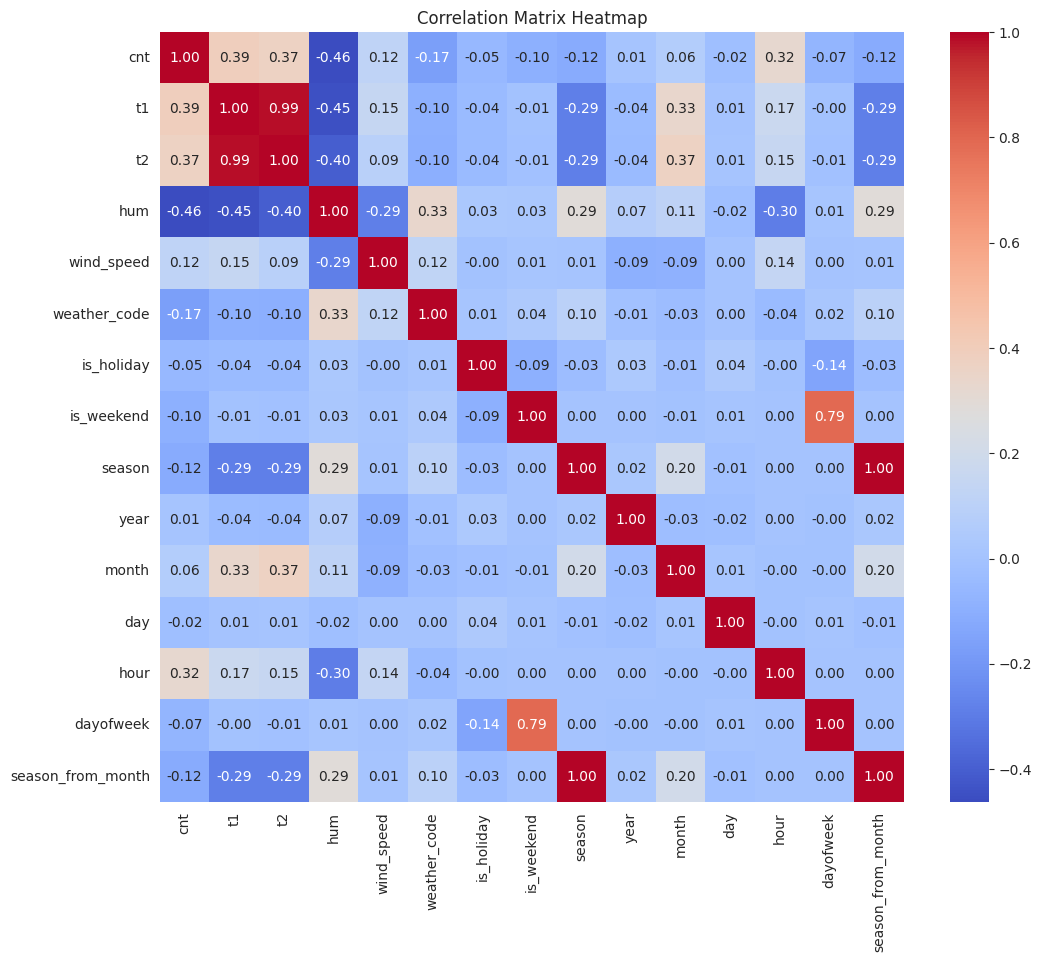

In [13]:

#TASK 06 - VISUALIZING THE CORRELATION WITH A HEATMAP

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Task-7
VISUALIZING THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLOT**

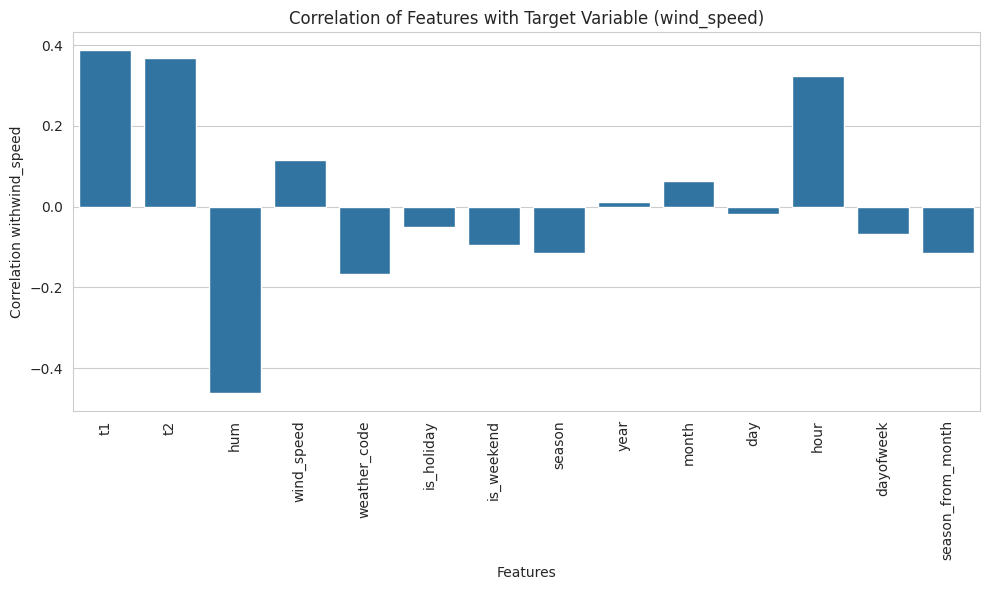

In [15]:
# prompt: #TASK 07 - VISUALIZING THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLO


# Calculate the correlation matrix
corr_matrix = data.corr()

# Extract the correlations with the 'cnt' column (target variable)
correlations = corr_matrix['cnt'].drop('cnt')  # Exclude the self-correlation

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Correlation withwind_speed')
plt.title('Correlation of Features with Target Variable (wind_speed)')
plt.tight_layout()
plt.show()

**Task-8
PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT**

In [16]:
# prompt: #TASK 08 - PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT
import plotly.express as px
# Assuming 'data' is your DataFrame and it has a 'timestamp' column and a 'cnt' column
# If 'timestamp' is the index, reset it first
if 'timestamp' not in data.columns:
    data = data.reset_index()

# Create the line plot
fig = px.line(data, x="timestamp", y="wind_speed", title="Bike Shares Over Time")

# Display the plot
fig.show()

**Task-9
PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH (USE LINEPLOT, POINTPOT, BARPLOT)**

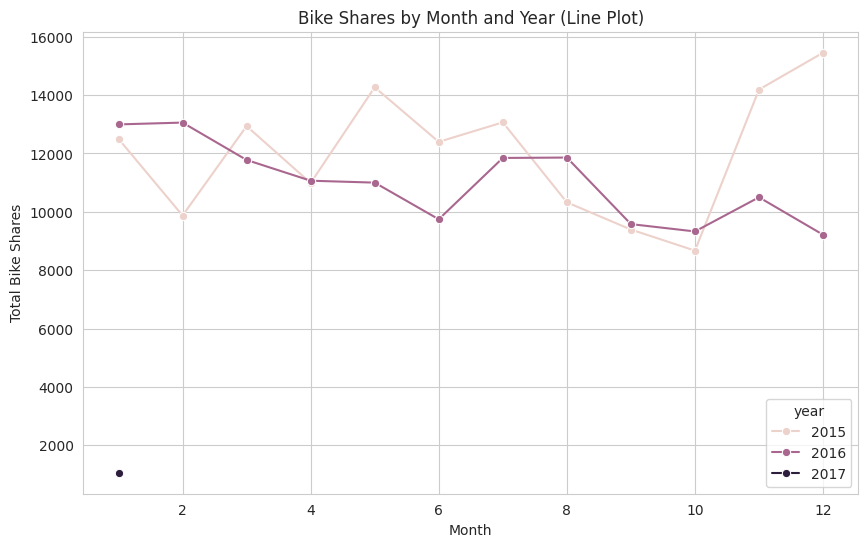

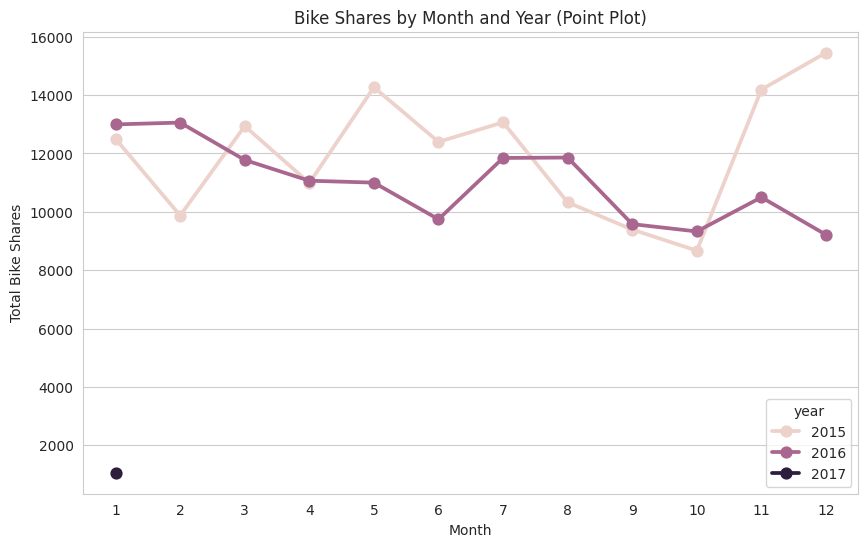

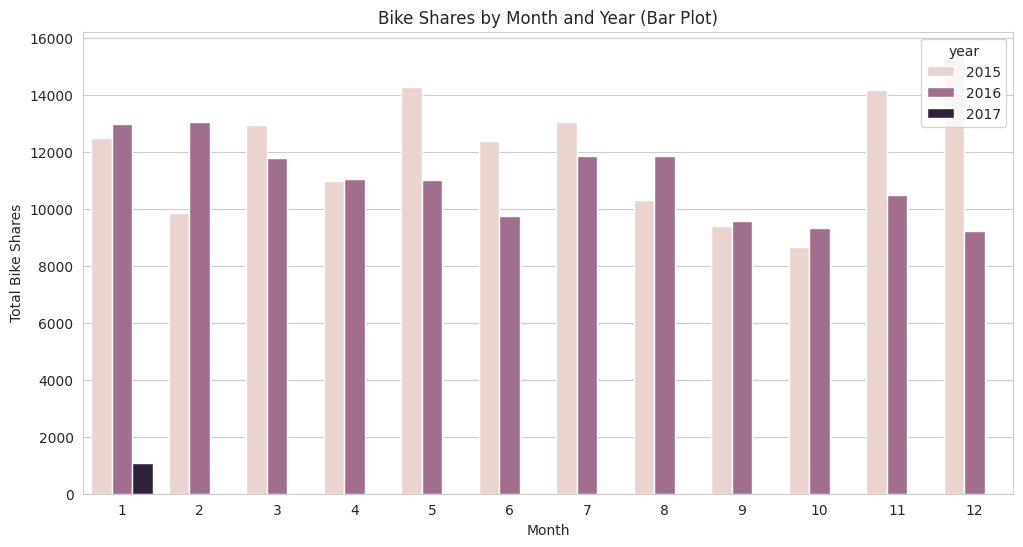

In [18]:
# prompt: #TASK 09 - PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH (USE LINEPLOT, POINTPOT, BARPLOT)

month_year_data = data.groupby(['year', 'month'])['wind_speed'].sum().reset_index()

# Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=month_year_data, x='month', y='wind_speed', hue='year', marker='o')
plt.title('Bike Shares by Month and Year (Line Plot)')
plt.xlabel('Month')
plt.ylabel('Total Bike Shares')
plt.show()

# Point Plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=month_year_data, x='month', y='wind_speed', hue='year')
plt.title('Bike Shares by Month and Year (Point Plot)')
plt.xlabel('Month')
plt.ylabel('Total Bike Shares')
plt.show()

# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=month_year_data, x='month', y='wind_speed', hue='year')
plt.title('Bike Shares by Month and Year (Bar Plot)')
plt.xlabel('Month')
plt.ylabel('Total Bike Shares')
plt.show()

**TASK 10 -
PLOTTING BIKE SHARES BY HOURS ON (HOLIDAYS, WEEKEND, SEASON)**

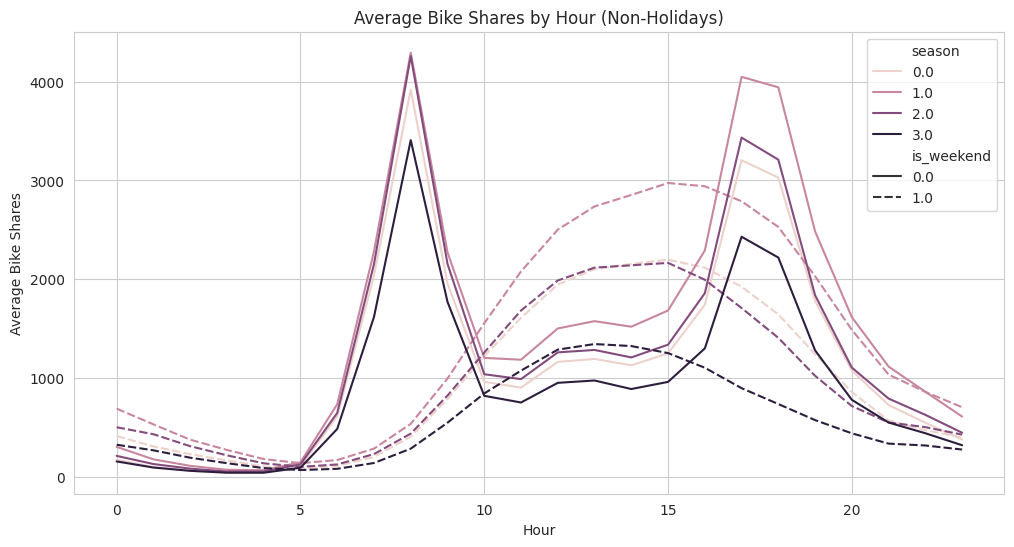

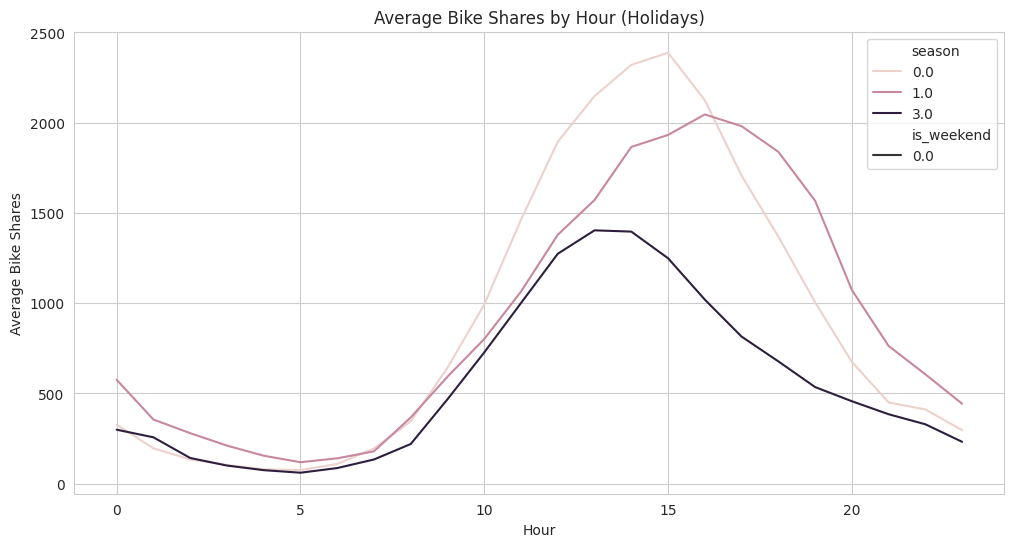

In [20]:
# prompt: #	TASK 10 - PLOTTING BIKE SHARES BY HOURS ON (HOLIDAYS, WEEKEND, SEASON)

grouped_data = data.groupby(['hour', 'is_holiday', 'is_weekend', 'season'])['cnt'].mean().reset_index()

# Create the plot for non-holidays
plt.figure(figsize=(12, 6))
# Changed 'wind_speed' to 'cnt' in the y parameter
sns.lineplot(x='hour', y='cnt', hue='season', style='is_weekend', data=grouped_data[grouped_data['is_holiday'] == 0])
plt.title('Average Bike Shares by Hour (Non-Holidays)')
plt.xlabel('Hour')
plt.ylabel('Average Bike Shares')
plt.show()

# Create the plot for holidays
plt.figure(figsize=(12, 6))
# Changed 'wind_speed' to 'cnt' in the y parameter
sns.lineplot(x='hour', y='cnt', hue='season', style='is_weekend', data=grouped_data[grouped_data['is_holiday'] == 1])
plt.title('Average Bike Shares by Hour (Holidays)')
plt.xlabel('Hour')
plt.ylabel('Average Bike Shares')
plt.show()

**TASK 11 - PLOTTING BIKE SHARES BY DAY OF WEEK**

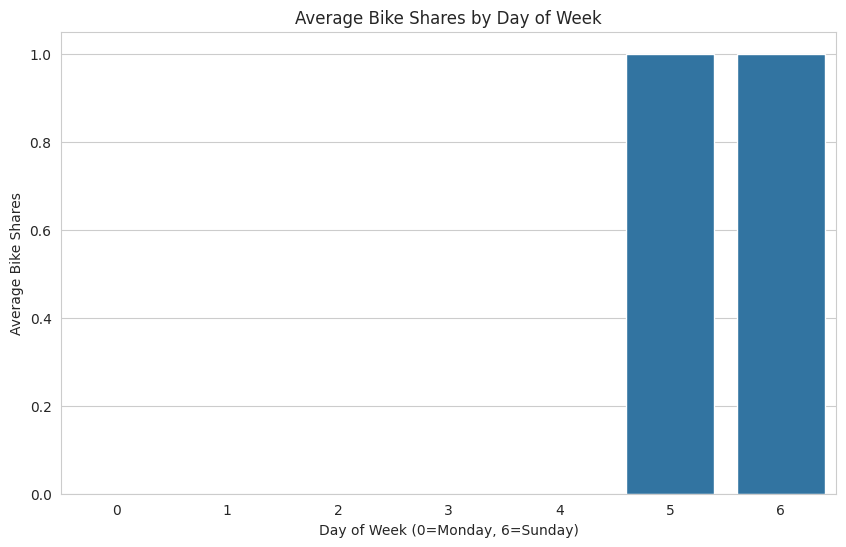

In [22]:
# prompt: TASK 11 - PLOTTING BIKE SHARES BY DAY OF WEEK

# Plotting Bike Shares by Day of Week
plt.figure(figsize=(10, 6))
sns.barplot(x='dayofweek', y='is_weekend', data=data)
plt.title('Average Bike Shares by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Bike Shares')
plt.show()

**TASK-12
PLOTTING BIKE SHARES BY DAY OF MONTH**

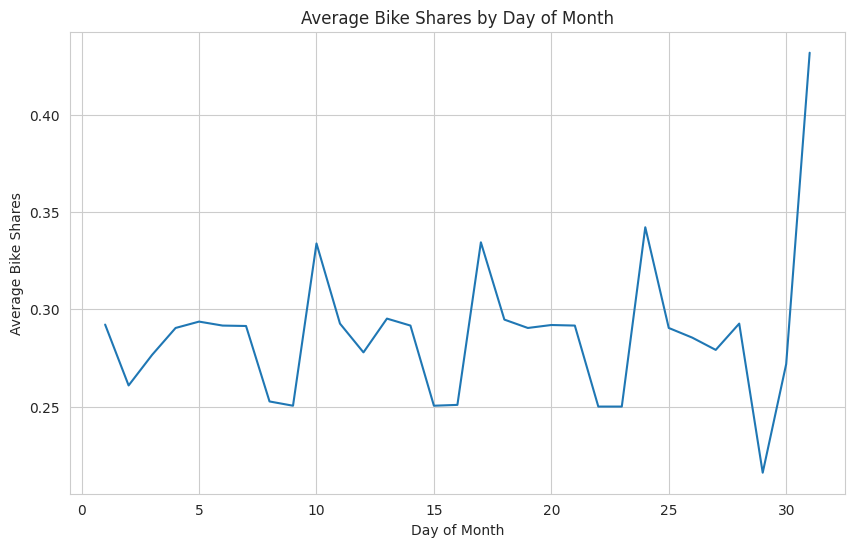

In [23]:
# prompt: #TASK 12 - PLOTTING BIKE SHARES BY DAY OF MONTH

bike_share_by_day = data.groupby('day')['is_weekend'].mean()

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.plot(bike_share_by_day.index, bike_share_by_day.values)
plt.xlabel('Day of Month')
plt.ylabel('Average Bike Shares')
plt.title('Average Bike Shares by Day of Month')
plt.grid(True)
plt.show()

**TASK 13-
PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS BY SEASON**

In [24]:
# prompt: #	TASK 13 - PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS BY SEASON

import altair as alt

# Plot bike shares by year
alt.Chart(data).mark_line().encode(
    x='year:N',
    y='mean(cnt)'
).properties(
    title='Average Bike Shares per Year'
)

# Plot bike shares on holidays by season
alt.Chart(data[data['is_holiday'] == 1]).mark_bar().encode(
    x='season:N',
    y='mean(cnt)',
    color='season:N'
).properties(
    title='Average Bike Shares on Holidays by Season'
)

alt.Chart(...)

**TASK 14-
VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT**

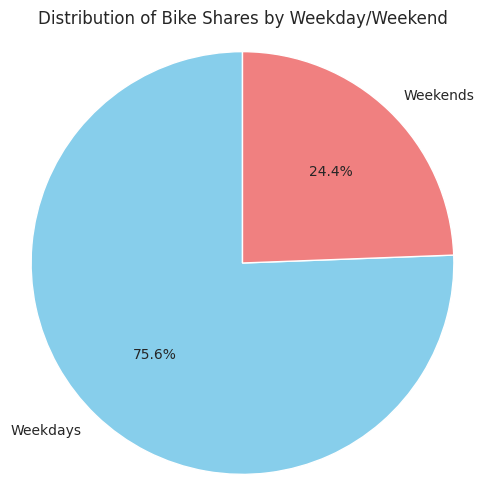

<ipython-input-27-2c618bb37523>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




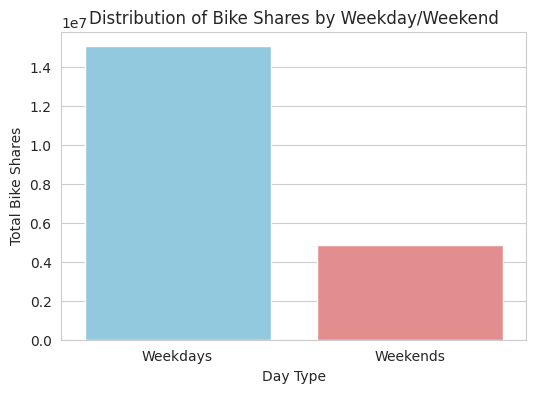

In [27]:
# prompt: #	TASK 14 - VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT

weekday_count = data[data['is_weekend'] == 0]['cnt'].sum()
weekend_count = data[data['is_weekend'] == 1]['cnt'].sum()

# Create a pie chart
labels = ['Weekdays', 'Weekends']
sizes = [weekday_count, weekend_count]
colors = ['skyblue', 'lightcoral']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Bike Shares by Weekday/Weekend')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=sizes, palette=colors)
plt.xlabel('Day Type')
plt.ylabel('Total Bike Shares')
plt.title('Distribution of Bike Shares by Weekday/Weekend')
plt.show()

**TASK 15 - PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON**

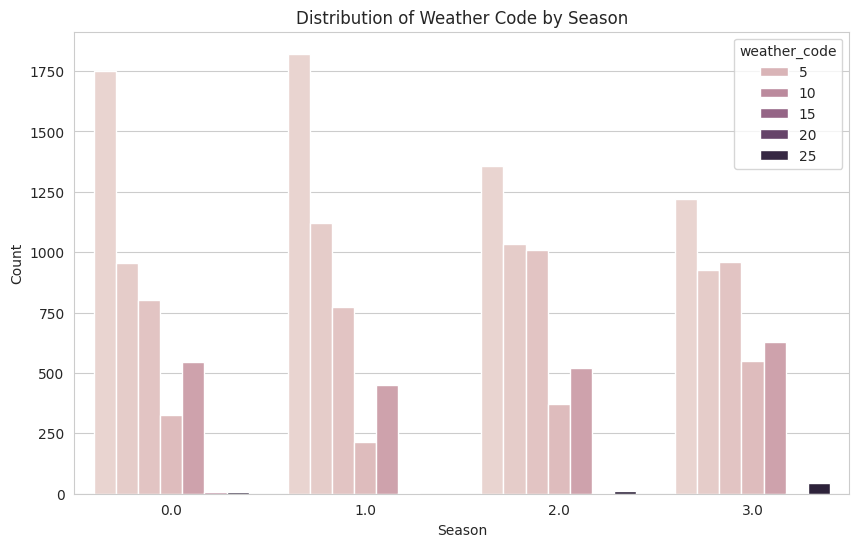

In [29]:

#Task-15
# prompt: Using dataframe data: PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON

import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(x='season', hue='weather_code', data=Set)
plt.title('Distribution of Weather Code by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()
